# Hierarchical Clustering

## Library 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## dataset 읽어오기

In [2]:
data_path = 'datas_ml/Mall_Customers.csv'
df = pd.read_csv(data_path)

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = df.loc[:, 'Genre':]

In [5]:
X.head(3)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [6]:
X['Genre'].nunique()

2

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()

In [9]:
X['Genre'] = encoder.fit_transform(X['Genre'])

In [10]:
X.head(3)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


In [11]:
from sklearn.preprocessing import StandardScaler

# StandardScaler로 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Datafraome으로 변환
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

print(X_scaled)

        Genre       Age  Annual Income (k$)  Spending Score (1-100)
0    1.128152 -1.424569           -1.738999               -0.434801
1    1.128152 -1.281035           -1.738999                1.195704
2   -0.886405 -1.352802           -1.700830               -1.715913
3   -0.886405 -1.137502           -1.700830                1.040418
4   -0.886405 -0.563369           -1.662660               -0.395980
..        ...       ...                 ...                     ...
195 -0.886405 -0.276302            2.268791                1.118061
196 -0.886405  0.441365            2.497807               -0.861839
197  1.128152 -0.491602            2.497807                0.923953
198  1.128152 -0.491602            2.917671               -1.250054
199  1.128152 -0.635135            2.917671                1.273347

[200 rows x 4 columns]


## Dendrogram을 그리고, 최적의 클러스터 갯수를 찾아보자

In [12]:
import scipy.cluster.hierarchy as sch

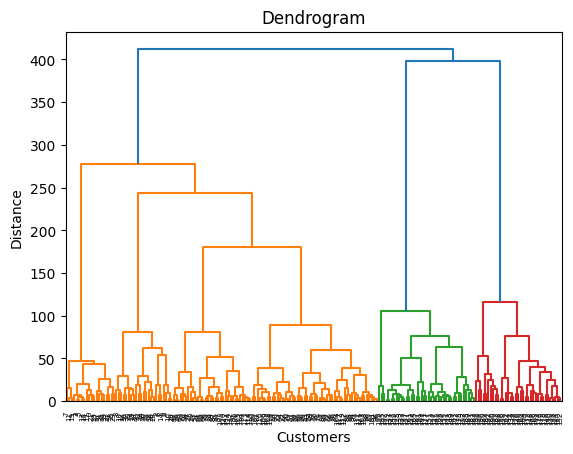

In [13]:
sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

In [14]:
# 높이의 의미
# - 낮은 높이: 비슷한 데이터
# - 높은 높이: 다른 데이터

## Training the Hierarchical Clustering model

In [15]:
# k: 6

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
hc = AgglomerativeClustering(n_clusters = 5)

In [18]:
y_pred = hc.fit_predict(X_scaled)

In [19]:
df['Group'] = y_pred

In [20]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [21]:
df['Group'].value_counts()

Group
0    61
1    39
3    38
2    33
4    29
Name: count, dtype: int64

In [22]:
X.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [23]:
X = X.values

In [24]:
X[y_pred == 0, 2]

array([15, 15, 16, 17, 18, 19, 19, 20, 20, 20, 21, 23, 24, 24, 25, 28, 28,
       29, 30, 33, 33, 34, 37, 38, 39, 39, 40, 40, 40, 42, 43, 46, 46, 48,
       48, 48, 54, 54, 54, 57, 58, 59, 60, 60, 60, 60, 61, 62, 62, 62, 63,
       64, 64, 65, 65, 67, 67, 69, 70, 72, 76])

## 그루핑 정보를 확인
- Annual Income에 따른 Spending Score의 그룹핑 결과 보기

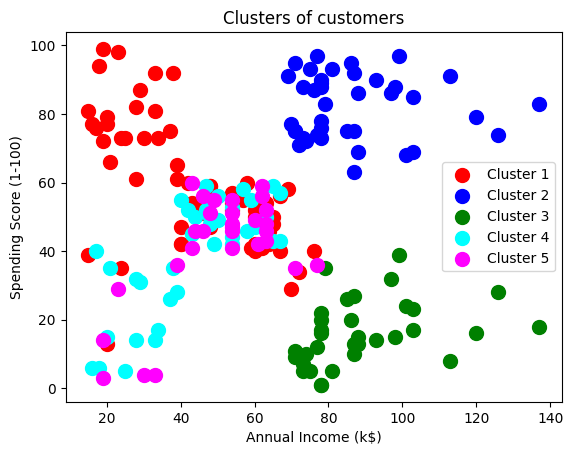

In [25]:
plt.scatter(X[y_pred==0,2], X[y_pred==0,3], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_pred==1,2], X[y_pred==1,3], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_pred==2,2], X[y_pred==2,3], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_pred==3,2], X[y_pred==3,3], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_pred==4,2], X[y_pred==4,3], s=100, c='magenta', label='Cluster 5')
# plt.scatter(X[y_pred==5,2], X[y_pred==5,3], s=100, c='magenta', label='Cluster 6')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

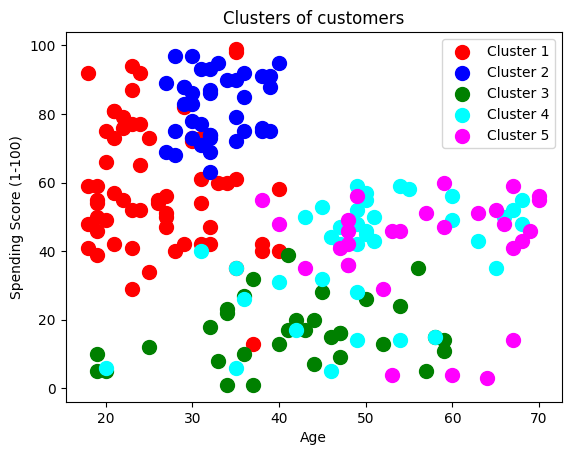

In [26]:
plt.scatter(X[y_pred == 0, 1], X[y_pred == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 1], X[y_pred == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 1], X[y_pred == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_pred == 3, 1], X[y_pred == 3, 3], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_pred == 4, 1], X[y_pred == 4, 3], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_pred == 5, 1], X[y_pred == 5, 3], s = 100, c = 'magenta', label = 'Cluster 6')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 그룹 정보를 데이터셋에 추가

In [27]:
df['Group']=y_pred
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


## 마케팅 이메일을 보내기 위해, 3번 그룹의 고객들만 가져와보자

In [28]:
df.loc[df['Group']==3]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
2,3,Female,20,16,6,3
4,5,Female,31,17,40,3
6,7,Female,35,18,6,3
12,13,Female,58,20,15,3
16,17,Female,35,21,35,3
22,23,Female,46,25,5,3
24,25,Female,54,28,14,3
26,27,Female,45,28,32,3
28,29,Female,40,29,31,3
34,35,Female,49,33,14,3
